In [1]:
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt

import lightkurve as lk

In [2]:
import pandas as pd

file_path = "/Users/mridul/Desktop/Physics Research Summer/CV-Analyzer/New Data/Data Files/Eclipsing CVs.csv"
df = pd.read_csv(file_path)

df.dtypes

TIC ID                                                              object
Other name                                                          object
CV Type                                                             object
Paper                                                               object
Link                                                                object
Key:                                                                object
Unnamed: 6                                                          object
https://iopscience.iop.org/article/10.3847/1538-4357/abf2bc/pdf    float64
dtype: object

In [3]:
for i in df['TIC ID']:
    try:
        int(i)
        print(lk.search_lightcurve(f'TIC {i}'))
    except:
        pass

In [3]:
# Specify the Eclipsing CVs: 
TIC = 'TIC 219107776'

data_all = lk.search_lightcurve(TIC, author='SPOC', cadence='short')

data_all

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 14,2019,SPOC,120,219107776,0.0
1,TESS Sector 15,2019,SPOC,120,219107776,0.0
2,TESS Sector 16,2019,SPOC,120,219107776,0.0
3,TESS Sector 17,2019,SPOC,120,219107776,0.0
4,TESS Sector 18,2019,SPOC,120,219107776,0.0
5,TESS Sector 20,2019,SPOC,120,219107776,0.0
6,TESS Sector 26,2020,SPOC,120,219107776,0.0
7,TESS Sector 24,2020,SPOC,120,219107776,0.0
8,TESS Sector 21,2020,SPOC,120,219107776,0.0


In [4]:
data_all[0]

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 14,2019,SPOC,120,219107776,0.0


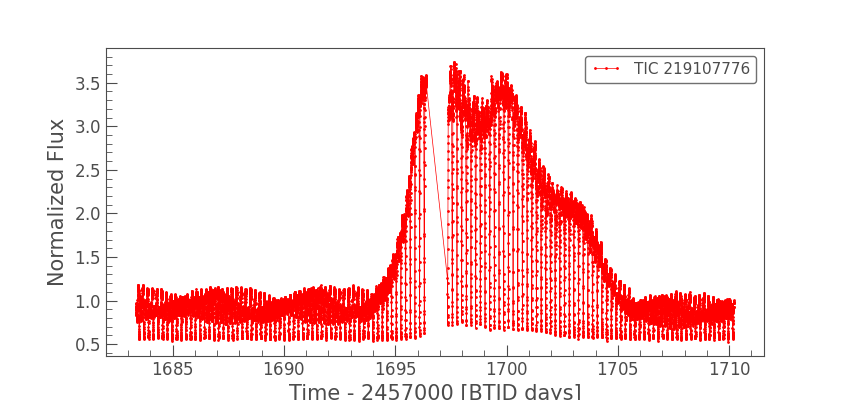

In [5]:
data = data_all[0]

lc = data.download_all().stitch()

p = lc.plot(linewidth = 0.5, marker = '.', color = 'r')

plt.show()

In [6]:
lc.to_timeseries()

/var/folders/dj/s7s773g53wg44p006fln3znw0000gn/T/ipykernel_93061/1963276583.py:1: LightkurveDeprecationWarning: `to_timeseries()` has been deprecated. `LightCurve` is a sub-class of Astropy TimeSeries as of Lightkurve v2.0 and no longer needs to be converted.
  lc.to_timeseries()


time,flux,flux_err,timecorr,cadenceno,centroid_col,centroid_row,sap_flux,sap_flux_err,sap_bkg,sap_bkg_err,pdcsap_flux,pdcsap_flux_err,quality,psf_centr1,psf_centr1_err,psf_centr2,psf_centr2_err,mom_centr1,mom_centr1_err,mom_centr2,mom_centr2_err,pos_corr1,pos_corr2
,,,d,,pix,pix,electron / s,electron / s,electron / s,electron / s,electron / s,electron / s,,pix,pix,pix,pix,pix,pix,pix,pix,pix,pix
Time,float32,float32,float32,int32,float64,float64,float32,float32,float32,float32,float32,float32,int32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32
1683.3538039952982,9.6186340e-01,1.9412868e-02,-1.0417943e-04,328247,184.99035,1034.14811,2.6254797e+02,5.2214947e+00,3.3987161e+02,2.2061210e+00,4.0432166e+02,8.1602468e+00,0,———,———,———,———,184.99035,1.1385355e-02,1034.14811,1.1466220e-02,-3.6085302e-03,-2.4877686e-02
1683.3551928842135,9.6925837e-01,1.9376906e-02,-1.0417881e-04,328248,184.99246,1034.15341,2.6455420e+02,5.2118216e+00,3.3792719e+02,2.2093523e+00,4.0743015e+02,8.1451302e+00,0,———,———,———,———,184.99246,1.1242153e-02,1034.15341,1.1388024e-02,-2.4708696e-03,-2.6225967e-02
1683.356581773122,9.2493480e-01,1.9404350e-02,-1.0417820e-04,328249,184.99962,1034.14854,2.5259653e+02,5.2192035e+00,3.4121524e+02,2.2293918e+00,3.8879865e+02,8.1566668e+00,0,———,———,———,———,184.99962,1.1731355e-02,1034.14854,1.1937857e-02,-6.8937452e-03,-2.7051156e-02
1683.3579706620221,9.3411064e-01,1.9368051e-02,-1.0417760e-04,328250,184.98212,1034.13974,2.5510999e+02,5.2094402e+00,3.3755975e+02,2.2193995e+00,3.9265573e+02,8.1414080e+00,0,———,———,———,———,184.98212,1.1632198e-02,1034.13974,1.1756951e-02,-7.9754870e-03,-3.1108106e-02
1683.3593595509221,9.2828804e-01,1.9407442e-02,-1.0417699e-04,328251,184.98377,1034.16350,2.5342151e+02,5.2200351e+00,3.4156158e+02,2.2162714e+00,3.9020819e+02,8.1579666e+00,0,———,———,———,———,184.98377,1.1735355e-02,1034.16350,1.1962997e-02,-6.5564462e-03,-2.2463121e-02
1683.360748439823,9.2671430e-01,1.9372253e-02,-1.0417639e-04,328252,184.99146,1034.13412,2.5312407e+02,5.2105703e+00,3.3936816e+02,2.2195981e+00,3.8954666e+02,8.1431742e+00,0,———,———,———,———,184.99146,1.1711117e-02,1034.13412,1.1867211e-02,-5.7092463e-03,-2.5228092e-02
1683.3621373287237,9.2391056e-01,1.9358208e-02,-1.0417579e-04,328253,184.98734,1034.14268,2.5226654e+02,5.2067933e+00,3.3764267e+02,2.2161531e+00,3.8836810e+02,8.1372709e+00,0,———,———,———,———,184.98734,1.1723098e-02,1034.14268,1.1950146e-02,-8.7647270e-03,-3.1278681e-02
1683.3635262176176,8.8552547e-01,1.9292515e-02,-1.0417519e-04,328254,185.00056,1034.14588,2.4202731e+02,5.1891232e+00,3.3822607e+02,2.2084286e+00,3.7223282e+02,8.1096563e+00,0,———,———,———,———,185.00056,1.2193167e-02,1034.14588,1.2395971e-02,-6.6128462e-03,-2.8517632e-02


In [7]:
lc.flux

<MaskedQuantity [0.9618634 , 0.96925837, 0.9249348 , ..., 0.9835927 ,
                 0.9804079 , 0.9838776 ]>

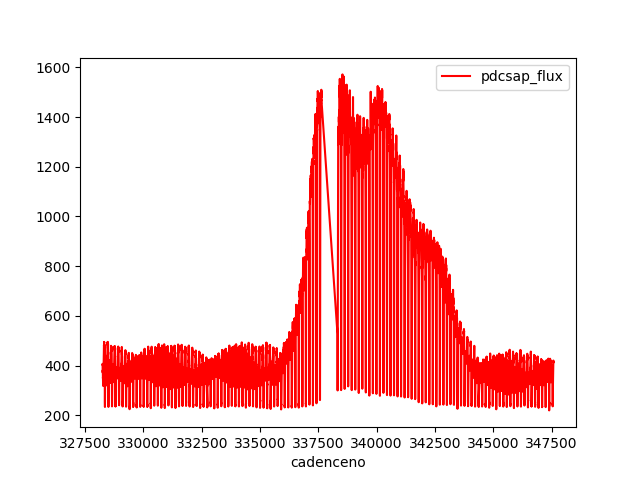

In [8]:
import pandas as pd

file_path = '/Users/mridul/Desktop/Physics Research Summer/CV-Analyzer/New Data/TIC 219107776.csv'
df = pd.read_csv(file_path)

plot = df.plot(x = 'cadenceno', y = 'pdcsap_flux', color = 'r')

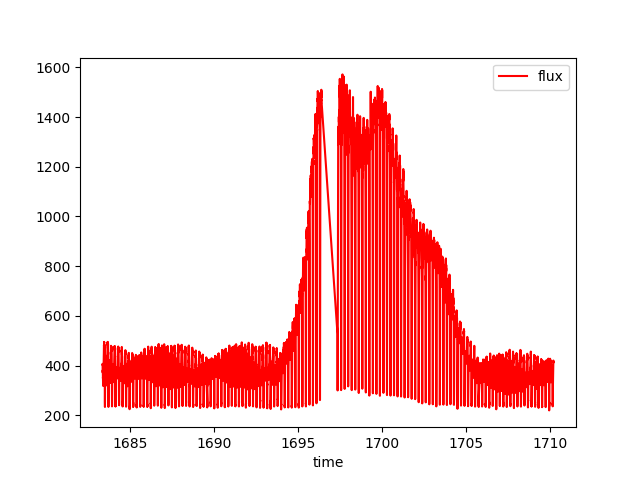

In [9]:
import pandas as pd

file_path = '/Users/mridul/Desktop/Physics Research Summer/CV-Analyzer/New Data/TIC 219107776.csv'
df = pd.read_csv(file_path)

plot = df.plot(x = 'time', y = 'flux', color = 'r')

In [10]:
df.to_csv('/Users/mridul/Desktop/Physics Research Summer/CV-Analyzer/New Data/TIC 219107776 big.csv', index = False)
print(df.columns)

dataframe = df[['time', 'flux']]

dataframe.to_csv('/Users/mridul/Desktop/Physics Research Summer/CV-Analyzer/New Data/TIC 219107776 small.csv', index = False)

Index(['time', 'flux', 'flux_err', 'timecorr', 'cadenceno', 'centroid_col',
       'centroid_row', 'sap_flux', 'sap_flux_err', 'sap_bkg', 'sap_bkg_err',
       'pdcsap_flux', 'pdcsap_flux_err', 'quality', 'psf_centr1',
       'psf_centr1_err', 'psf_centr2', 'psf_centr2_err', 'mom_centr1',
       'mom_centr1_err', 'mom_centr2', 'mom_centr2_err', 'pos_corr1',
       'pos_corr2'],
      dtype='object')


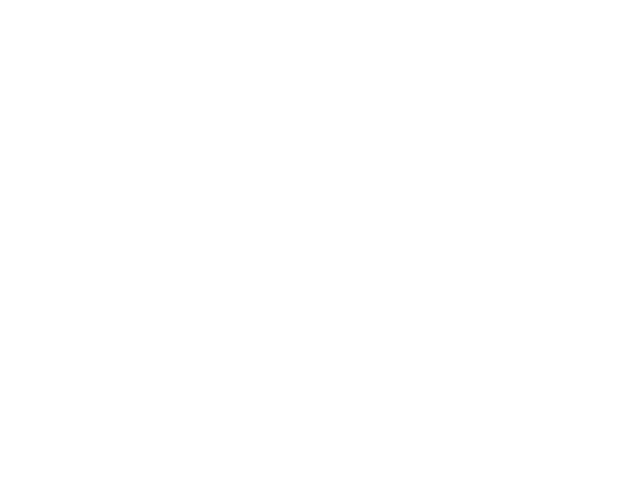

In [16]:
import numpy as np
from scipy.optimize import curve_fit

# Define the cosine function
def cosine_func(x, amplitude, frequency, phase):
    return amplitude * np.cos(2 * np.pi * frequency * x + phase)

# Extract the x and y data from the plot
x_data = plot.get_lines()[0].get_xdata()
y_data = plot.get_lines()[0].get_ydata()

# Perform the curve fitting
popt, pcov = curve_fit(cosine_func, x_data, y_data)

# Extract the optimized parameters
amplitude_opt = popt[0]
frequency_opt = popt[1]
phase_opt = popt[2]

# Generate the fitted curve
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = cosine_func(x_fit, amplitude_opt, frequency_opt, phase_opt)

plt.figure()
# Plot the fitted curve
plot.plot(x_fit, y_fit, color='red')

# Show the plot
plt.show()

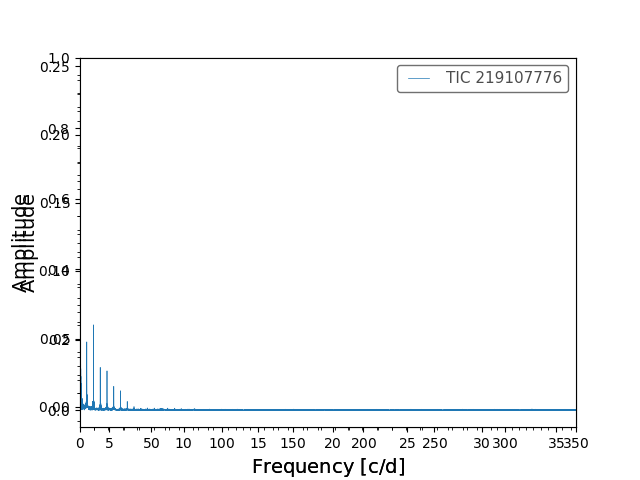

In [17]:
periodogram = lc.to_periodogram()

fig_LS, ax_LS = plt.subplots(1,1,num=4)
periodogram.plot(ax=ax_LS)
ax_LS.set_xlabel(r'${\rm Frequency~[c/d]}$', fontsize=14)
ax_LS.set_ylabel(r'${\rm Amplitude}$', fontsize=14)
ax_LS.set_xlim(0, 350)
#fig_LS.tight_layout()
plt.show()